In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import statsmodels.formula.api as smf
#from statsmodels.compat import lzip 
import statsmodels.stats.api as sms

In [44]:
path = os.getcwd() + '\\Analise e Tratamento\\Dados\\'
df = pd.read_csv(path + 'housing.csv', sep =',' , encoding = 'iso-8859-1')
df.head(3)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0


In [45]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, 3].values

In [46]:
regressao_linear = smf.ols('y ~ x', data = df).fit()

In [47]:
residuos = regressao_linear.resid

In [48]:
#TESTE DE NORMALIDADE DOS RESIDUOS
#Ho - Distribuição Normal: p > 0,05
#Ha - Distribuição não Normal: p <= 0,05 (Representa inconsistência do modelo)

In [49]:
estatistica, p = stats.shapiro(residuos)
print(f'Estatística de teste: {estatistica}.')
print(f'p-valor: {p}.')

Estatística de teste: 0.9171054363250732.
p-valor: 9.782326333115975e-16.


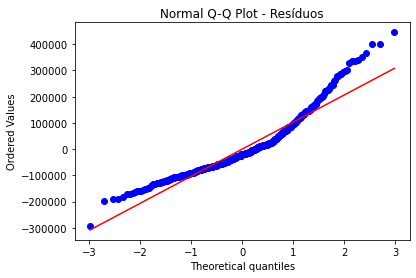

In [50]:
#Pontos azuls têm que estar alinhados à reta vermelha
stats.probplot(residuos, dist = 'norm', plot = plt)
plt.title('Normal Q-Q Plot - Resíduos')
plt.show()

In [51]:
#ANÁLISE DE HOMOCEDASTICIDADE (resíduos com varição constante) 
#Heterodasticidade: Dispersão com relação à linha central lanranja - Inconsistência do modelo 

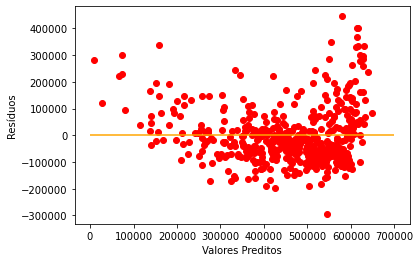

In [52]:
plt.scatter(y=residuos, x = regressao_linear.predict(), color = 'red')
plt.hlines(y = 0, xmin = 0, xmax = 700000, color = 'orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

In [53]:
#TESTE DE BREUSCH-PAGAN (HOMOCEDASTICIDADE OU HETERODASTICIDADE)
#Ho -> Homocedasticidade: p > 0,05
#Ha -> Não existe Homocedasticidade: p <= 0,05 (inconsistência do modelo)

In [54]:
estatistica_bp, p_pb, f_bp, fp = sms.het_breuschpagan(regressao_linear.resid, regressao_linear.model.exog)
print(f'Estatística de teste: {estatistica_bp}.')
print(f'p-valor: {p_pb}.')
print(f'f-valor: {f_bp}.')
print(f'f_p-valor: {fp}.')


Estatística de teste: 5.382553364026892.
p-valor: 0.020339089399130483.
f-valor: 5.420200421872264.
f_p-valor: 5.420200421872264.


In [55]:
#OUTLIERS DOS RESIDUOS (DEVE ESTAR ENTRE -3 E 3)

In [56]:
outliers = regressao_linear.outlier_test()

In [57]:
outliers.max() #Problema ne outlier (4.23)

student_resid    4.227468
unadj_p          0.999732
bonf(p)          1.000000
dtype: float64

In [58]:
outliers.min()

student_resid   -2.762057
unadj_p          0.000028
bonf(p)          0.013809
dtype: float64

In [59]:
#Resumo

#Estatística t (P>|t|)
#Ho -> Coeficiente igual a zero e p > 0,05 (coeficiente não validado)
#Ha -> Coeficiente diferente de zero e p <= 0,05 (coeficiente validado) *esse caso*

#R^2 ajustado = 0,578

print(regressao_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.93e-93
Time:                        10:49:53   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.841e+05   1.01e+04     67.551      0.0

In [60]:
coefs = pd.DataFrame(regressao_linear.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept  684138.493068
x          -17759.048327


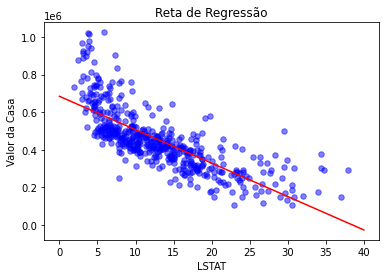

In [61]:
#Dispersão dos dados em relação à reta de regressão.

plt.scatter(y=df.MEDV, x = df.LSTAT, color = 'blue', s= 30, alpha = 0.5)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot * regressao_linear.params[1] + regressao_linear.params[0], color = 'r')
plt.title('Reta de Regressão')
plt.ylabel('Valor da Casa')
plt.xlabel('LSTAT')
plt.show()

In [62]:
#Comparação entre o valor real e a previsão
df_lstat = df.copy()
df_lstat = df_lstat[['LSTAT', 'MEDV']]
df_lstat['Previsao'] = regressao_linear.fittedvalues
df_lstat.head()

,LSTAT,MEDV,Previsao
0,4.98,504000.0,595698.432398
1,9.14,453600.0,521820.791356
2,4.03,728700.0,612569.528309
3,2.94,701400.0,631926.890986
4,5.33,760200.0,589482.765484


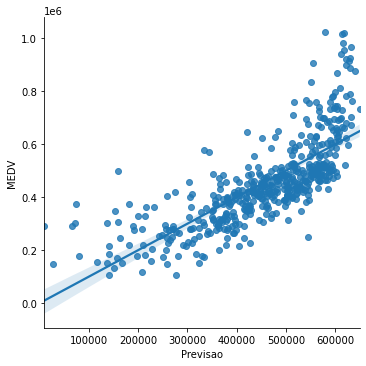

In [63]:
#Reta aproximando o valor real e a previsão

sb.lmplot(x = 'Previsao', y = 'MEDV', data=df_lstat)